In [1]:
# Importer les modules nécessaires
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
# LabelEncoder est une classe qui permet de convertir des étiquettes catégorielles en valeurs numériques

In [2]:
# Lire le fichier CSV qui contient les données des clients d'une banque
data = pd.read_csv("insurance.csv")
# Afficher les données sous forme de tableau
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
#afficher le nombres de colonnes et de ligne du dataset
data.shape

(1338, 7)

In [4]:
#types des donnees
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
#verifications des cases vides
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# Afficher les valeurs uniques de la colonne sex
data.sex.unique()

array(['female', 'male'], dtype=object)

In [7]:
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])

<Axes: xlabel='charges'>

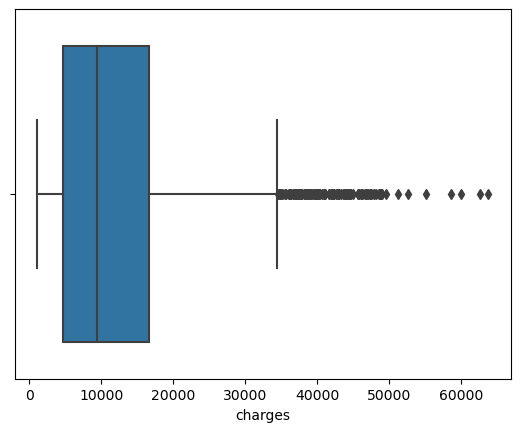

In [8]:
#verifiactions des outlayer
sns.boxplot(x = "charges",data=data)

In [9]:
# Afficher les nouvelles valeurs uniques de la colonne sex
data.sex.unique()

array([0, 1])

In [10]:
# Afficher les valeurs uniques de la colonne smoker
data.smoker.unique()

array(['yes', 'no'], dtype=object)

In [11]:
le2 = LabelEncoder()
data['smoker'] = le2.fit_transform(data['smoker'])

In [12]:
# Afficher les nouvelles valeurs uniques de la colonne smoker
data.smoker.unique()

array([1, 0])

In [13]:
# Afficher les valeurs uniques de la colonne region
data.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [14]:
le3 = LabelEncoder()
data['region'] = le3.fit_transform(data['region'])

In [15]:
# Afficher les nouvelles valeurs uniques de la colonne region
data.region.unique()

array([3, 2, 1, 0])

In [16]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [17]:
#types des donnees
data.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

<Axes: >

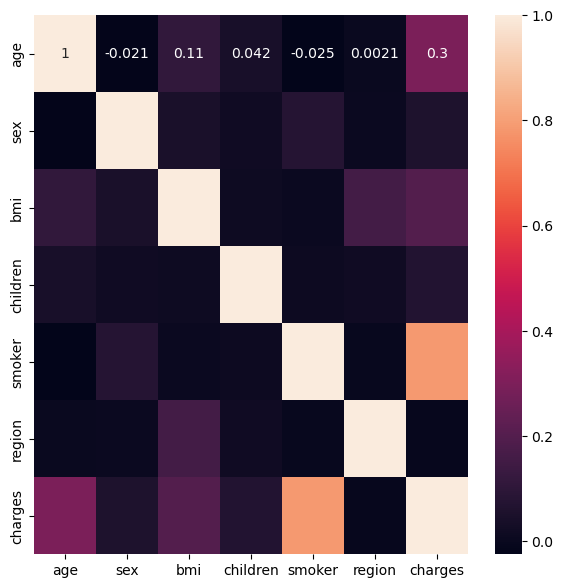

In [18]:
# Créer une figure de taille 7x7 pouces
plt.figure(figsize=(7,7))
# Afficher une carte de chaleur des corrélations entre les colonnes des données
# La méthode corr() calcule la matrice de corrélation des données
# La méthode heatmap() trace une carte de chaleur à partir d'une matrice de données
# Le paramètre annot=True permet d'afficher les valeurs des corrélations sur la carte
sns.heatmap(data.corr(),annot=True)

In [19]:
# Afficher les noms des colonnes des données
data.columns 

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [20]:
# Séparer les données en deux variables : X et y
# X contient toutes les colonnes sauf charges, qui est la variable cible à prédire
# y contient uniquement la colonne charges, qui indique si le client a quitté la banque ou non
X = data.drop(["charges"],axis=1)
y = data[["charges"]]

In [21]:
# Importer la fonction train_test_split du sous-module sklearn.model_selection
from sklearn.model_selection import train_test_split

# Diviser les données en deux ensembles : un ensemble d'entraînement et un ensemble de test
# L'ensemble d'entraînement contient 70% des données, et l'ensemble de test contient 30% des données
# La fonction train_test_split renvoie quatre variables : X_train, X_test, y_train, y_test
# X_train et y_train contiennent les variables explicatives et la variable cible de l'ensemble d'entraînement
# X_test et y_test contiennent les variables explicatives et la variable cible de l'ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [22]:
# Importer la classe MinMaxScaler du sous-module sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

# Créer une instance de la classe MinMaxScaler
scaler = MinMaxScaler()

# Appliquer la normalisation des données à l'ensemble d'entraînement
# La méthode fit_transform apprend les paramètres de la normalisation (minimum et maximum) et les applique aux données
# La normalisation consiste à transformer les valeurs des données dans l'intervalle [0,1] selon la formule : (x - min) / (max - min)
# Les données normalisées sont stockées dans la variable X_train_sc
X_train_sc = scaler.fit_transform(X_train)


In [23]:

# Appliquer la normalisation des données à l'ensemble de test
# La méthode fit_transform apprend les paramètres de la normalisation (minimum et maximum) et les applique aux données
# La normalisation consiste à transformer les valeurs des données dans l'intervalle [0,1] selon la formule : (x - min) / (max - min)
# Les données normalisées sont stockées dans la variable X_test_sc
X_test_sc = scaler.fit_transform(X_test)
X_test_sc

array([[0.95652174, 1.        , 0.65456035, 0.        , 0.        ,
        0.66666667],
       [0.        , 0.        , 0.5704533 , 0.        , 0.        ,
        0.66666667],
       [0.47826087, 1.        , 0.45917531, 0.2       , 1.        ,
        0.        ],
       ...,
       [0.        , 1.        , 0.19456581, 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.42927362, 0.4       , 1.        ,
        0.66666667],
       [0.93478261, 1.        , 0.21013108, 0.        , 0.        ,
        0.        ]])

In [24]:
# Appliquer la normalisation des données à la variable cible y_train
# La méthode fit_transform apprend les paramètres de la normalisation (minimum et maximum) et les applique aux données
# La normalisation consiste à transformer les valeurs des données dans l'intervalle [0,1] selon la formule : (x - min) / (max - min)
# Les données normalisées sont stockées dans la variable y_train_sc
y_train_sc = scaler.fit_transform(y_train)
y_train_sc

array([[1.17470595e-01],
       [1.62039066e-01],
       [1.94001376e-01],
       [1.40343199e-01],
       [2.38157305e-02],
       [2.93665440e-02],
       [1.78551059e-02],
       [1.27618610e-02],
       [1.84696484e-01],
       [2.00891254e-01],
       [6.13765751e-02],
       [1.56037322e-01],
       [3.51058984e-02],
       [1.38415240e-01],
       [1.26063964e-01],
       [6.17069187e-02],
       [7.78389392e-01],
       [1.66899052e-01],
       [1.68102133e-01],
       [1.81333613e-01],
       [1.01287895e-01],
       [4.92567575e-02],
       [1.54094645e-01],
       [5.93542553e-01],
       [1.57852970e-01],
       [8.39478969e-02],
       [1.25349126e-01],
       [4.36293765e-01],
       [8.23713128e-02],
       [1.72761989e-01],
       [2.99610700e-01],
       [4.29376151e-02],
       [2.09203960e-01],
       [2.18680519e-03],
       [1.20282489e-01],
       [1.64671197e-01],
       [2.19853300e-02],
       [2.61183521e-02],
       [1.60942573e-01],
       [1.27644844e-01],


## Contruction de ANN 

In [25]:
# Importer la bibliothèque keras
import keras

# Importer les classes Sequential, Dense et Activation du module keras.models
from keras.models import Sequential
from keras.layers import Dense

In [26]:
# Créer un modèle séquentiel vide
model_ann = Sequential()

# Ajouter une couche dense avec 7 unités, une initialisation uniforme des poids, une fonction d'activation relu et une dimension d'entrée égale au nombre de colonnes de X_train
model_ann.add(Dense(units = 7,kernel_initializer ="uniform",activation = "relu",input_dim = X_train.shape[1]))

# Ajouter une deuxième couche dense avec 10 unités, une initialisation uniforme des poids et une fonction d'activation relu
model_ann.add(Dense(units = 10,kernel_initializer = "uniform",activation="relu"))

# Ajouter une troisième couche dense avec 10 unités, une initialisation uniforme des poids et une fonction d'activation relu
model_ann.add(Dense(units = 10,kernel_initializer = "uniform",activation="relu"))

# Ajouter une quatrième couche dense avec 1 unité, une initialisation uniforme des poids et une fonction d'activation linéaire
# Cette couche représente la sortie du modèle, qui est une valeur continue
model_ann.add(Dense(units = 1,kernel_initializer = "uniform",activation = "linear"))

# Afficher le résumé du modèle, qui indique le nombre de paramètres et de couches du modèle
model_ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 49        
                                                                 
 dense_1 (Dense)             (None, 10)                80        
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 250
Trainable params: 250
Non-trainable params: 0
_________________________________________________________________


In [27]:
data.shape

(1338, 7)

In [28]:
# Compiler le modèle en utilisant l'optimiseur Adam, la fonction de coût mean_squared_error et la métrique accuracy
model_ann.compile(optimizer = 'Adam', loss = 'mean_squared_error', metrics = ['accuracy'])

In [29]:
# Entraîner le modèle sur l'ensemble d'entraînement normalisé, avec un nombre d'époques de 250, une taille de lot de 32 et une validation croisée de 20%
# La méthode fit renvoie un objet historique qui contient les valeurs de la fonction de coût et de la métrique à chaque époque
model = model_ann.fit(X_train_sc, y_train_sc, epochs = 100, batch_size = 32, validation_split=0.2)

Epoch 1/100
24/24 [==============================] - 3s 46ms/step - loss: 0.0685 - accuracy: 0.0013 - val_loss: 0.0728 - val_accuracy: 0.0000e+00
Epoch 2/100
24/24 [==============================] - 1s 23ms/step - loss: 0.0573 - accuracy: 0.0013 - val_loss: 0.0583 - val_accuracy: 0.0000e+00
Epoch 3/100
24/24 [==============================] - 0s 14ms/step - loss: 0.0434 - accuracy: 0.0013 - val_loss: 0.0403 - val_accuracy: 0.0000e+00
Epoch 4/100
24/24 [==============================] - 0s 10ms/step - loss: 0.0339 - accuracy: 0.0013 - val_loss: 0.0354 - val_accuracy: 0.0000e+00
Epoch 5/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0323 - accuracy: 0.0013 - val_loss: 0.0340 - val_accuracy: 0.0000e+00
Epoch 6/100
24/24 [==============================] - 0s 19ms/step - loss: 0.0301 - accuracy: 0.0013 - val_loss: 0.0303 - val_accuracy: 0.0000e+00
Epoch 7/100
24/24 [==============================] - 0s 18ms/step - loss: 0.0266 - accuracy: 0.0013 - val_loss: 0.0266 - val

Epoch 57/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0082 - accuracy: 0.0027 - val_loss: 0.0086 - val_accuracy: 0.0000e+00
Epoch 58/100
24/24 [==============================] - 0s 14ms/step - loss: 0.0083 - accuracy: 0.0013 - val_loss: 0.0084 - val_accuracy: 0.0000e+00
Epoch 59/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0081 - accuracy: 0.0013 - val_loss: 0.0084 - val_accuracy: 0.0000e+00
Epoch 60/100
24/24 [==============================] - 0s 14ms/step - loss: 0.0081 - accuracy: 0.0027 - val_loss: 0.0088 - val_accuracy: 0.0000e+00
Epoch 61/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0081 - accuracy: 0.0027 - val_loss: 0.0083 - val_accuracy: 0.0000e+00
Epoch 62/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0080 - accuracy: 0.0027 - val_loss: 0.0082 - val_accuracy: 0.0000e+00
Epoch 63/100
24/24 [==============================] - 0s 19ms/step - loss: 0.0080 - accuracy: 0.0013 - val_loss: 0.008

In [30]:
model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [31]:
# Importer le module matplotlib.pyplot
import matplotlib.pyplot as plt

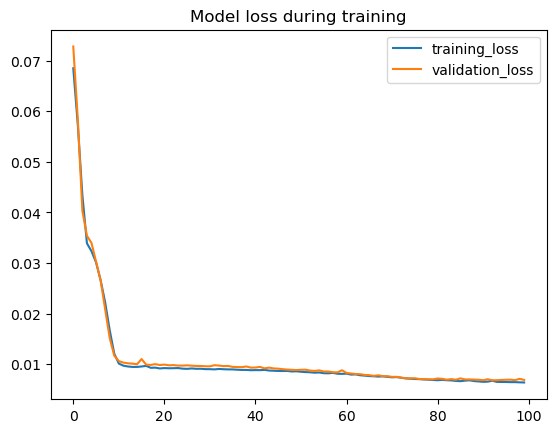

In [32]:
import matplotlib.pyplot as plt
plt.plot(model.history["loss"])
plt.plot(model.history["val_loss"])
plt.title("Model loss during training")
plt.legend(["training_loss","validation_loss"])

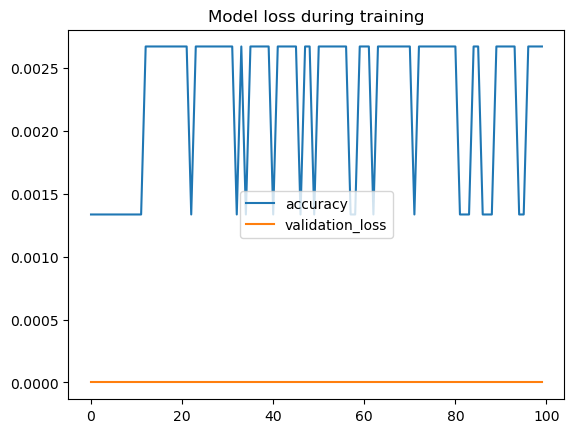

In [33]:
plt.plot(model.history["accuracy"])
plt.plot(model.history["val_accuracy"])
plt.title("Model loss during training")
plt.legend(["accuracy","validation_loss"])

In [34]:
# Prédire les valeurs de la variable cible y_test à partir du modèle entraîné
# La méthode predict renvoie les valeurs normalisées entre 0 et 1
y_predict = model_ann.predict(X_test_sc)
y_predict

13/13 [==============================] - 1s 17ms/step


array([[0.20697057],
       [0.03167497],
       [0.56945944],
       [0.14662132],
       [0.03167033],
       [0.16988257],
       [0.12332518],
       [0.11347493],
       [0.03167033],
       [0.17977683],
       [0.1795413 ],
       [0.08996547],
       [0.07177063],
       [0.2905445 ],
       [0.11673623],
       [0.28999862],
       [0.21598947],
       [0.0397463 ],
       [0.19254635],
       [0.03167033],
       [0.7204344 ],
       [0.13042544],
       [0.07133576],
       [0.1435852 ],
       [0.22495455],
       [0.03723208],
       [0.12401245],
       [0.1101722 ],
       [0.69972354],
       [0.29081076],
       [0.03167033],
       [0.03343051],
       [0.03167033],
       [0.19387089],
       [0.03954392],
       [0.22512949],
       [0.05795757],
       [0.06697344],
       [0.03167033],
       [0.94795597],
       [0.81589407],
       [0.12003839],
       [0.03167033],
       [0.03858003],
       [0.05722126],
       [0.03184345],
       [0.12068626],
       [0.102

In [35]:
# Inverser la normalisation des données pour obtenir les valeurs originales
# La méthode inverse_transform utilise les paramètres de la normalisation appris sur l'ensemble d'entraînement et les inverse sur les données
# Les valeurs originales sont stockées dans la variable y_predict_orig
y_predict_orig = scaler.inverse_transform(y_predict)
y_predict_orig

array([[13844.5625],
       [ 3068.9658],
       [36127.113 ],
       [10134.833 ],
       [ 3068.6807],
       [11564.726 ],
       [ 8702.797 ],
       [ 8097.291 ],
       [ 3068.6807],
       [12172.936 ],
       [12158.458 ],
       [ 6652.141 ],
       [ 5533.686 ],
       [18981.936 ],
       [ 8297.767 ],
       [18948.379 ],
       [14398.963 ],
       [ 3565.1187],
       [12957.891 ],
       [ 3068.6807],
       [45407.7   ],
       [ 9139.257 ],
       [ 5506.954 ],
       [ 9948.2   ],
       [14950.055 ],
       [ 3410.5671],
       [ 8745.043 ],
       [ 7894.2695],
       [44134.58  ],
       [18998.303 ],
       [ 3068.6807],
       [ 3176.8809],
       [ 3068.6807],
       [13039.312 ],
       [ 3552.6782],
       [14960.809 ],
       [ 4684.5835],
       [ 5238.7983],
       [ 3068.6807],
       [59393.676 ],
       [51275.7   ],
       [ 8500.754 ],
       [ 3068.6807],
       [ 3493.427 ],
       [ 4639.322 ],
       [ 3079.3228],
       [ 8540.579 ],
       [ 7402

In [36]:
# Convertir la variable y_test en un tableau numpy
# La variable y_test est une série pandas qui contient les valeurs originales de la variable cible
y_test_orig = np.array(y_test)
y_test_orig

array([[12982.8747 ],
       [ 1629.8335 ],
       [39125.33225],
       [ 7804.1605 ],
       [ 1607.5101 ],
       [ 8538.28845],
       [ 7256.7231 ],
       [ 6184.2994 ],
       [ 1748.774  ],
       [13616.3586 ],
       [10928.849  ],
       [ 5910.944  ],
       [ 4058.71245],
       [16138.76205],
       [ 6775.961  ],
       [17361.7661 ],
       [13405.3903 ],
       [ 2699.56835],
       [ 9875.6804 ],
       [ 1621.8827 ],
       [44202.6536 ],
       [ 5989.52365],
       [ 1149.3959 ],
       [ 9101.798  ],
       [14455.64405],
       [ 3561.8889 ],
       [ 7441.501  ],
       [ 3994.1778 ],
       [46599.1084 ],
       [12592.5345 ],
       [ 1711.0268 ],
       [ 3046.062  ],
       [ 2102.2647 ],
       [13457.9608 ],
       [ 2801.2588 ],
       [14319.031  ],
       [ 4746.344  ],
       [ 3956.07145],
       [ 1625.43375],
       [44501.3982 ],
       [48549.17835],
       [ 7151.092  ],
       [ 1632.03625],
       [ 2254.7967 ],
       [ 2480.9791 ],
       [ 1

In [37]:
# Normaliser la variable y_test avec les mêmes paramètres que l'ensemble d'entraînement
# La méthode transform utilise les paramètres de la normalisation appris sur l'ensemble d'entraînement et les applique aux données
# Les valeurs normalisées sont stockées dans la variable y_test_sc
y_test_sc = scaler.transform(y_test)
y_test_sc

array([[1.92952790e-01],
       [8.26340236e-03],
       [6.18233945e-01],
       [1.08706328e-01],
       [7.90024900e-03],
       [1.20648999e-01],
       [9.98007073e-02],
       [8.23546968e-02],
       [1.01983067e-02],
       [2.03258201e-01],
       [1.59538241e-01],
       [7.79077966e-02],
       [4.77760015e-02],
       [2.44292241e-01],
       [9.19797494e-02],
       [2.64187868e-01],
       [1.99826204e-01],
       [2.56656711e-02],
       [1.42405469e-01],
       [8.13406007e-03],
       [7.00830965e-01],
       [7.91861173e-02],
       [4.47723323e-04],
       [1.29816079e-01],
       [2.16911557e-01],
       [3.96937586e-02],
       [1.02806644e-01],
       [4.67261625e-02],
       [7.39816094e-01],
       [1.86602801e-01],
       [9.58424148e-03],
       [3.13023723e-02],
       [1.59488346e-02],
       [2.00681412e-01],
       [2.73199545e-02],
       [2.14689159e-01],
       [5.89622773e-02],
       [4.61062548e-02],
       [8.19182796e-03],
       [7.05690893e-01],


In [38]:
# Importer les fonctions r2_score, mean_squared_error et mean_absolute_error du sous-module sklearn.metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculer et afficher les mesures de performance du modèle
# Le coefficient de détermination R2 mesure la proportion de la variance de la variable cible qui est expliquée par le modèle
# L'erreur quadratique moyenne MSE mesure la moyenne des carrés des erreurs entre les valeurs réelles et les valeurs prédites
# L'erreur absolue moyenne MAE mesure la moyenne des valeurs absolues des erreurs entre les valeurs réelles et les valeurs prédites
R2 = r2_score(y_test_orig, y_predict_orig)
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
print(R2, MSE, MAE)

0.8437480579656937 23836809.117810108 2898.31065333586
